In [1]:
import pandas as pd
import numpy as np

In [8]:
table = pd.DataFrame(index=['Spam', 'Ham'])

# Link
table['prior'] = 0.5
table['likelihood'] = 0.6, 0.2
table['joint'] = table['prior'] * table['likelihood']

norm_const = table['joint'].sum()
table['posterior'] = table['joint'] / norm_const
print(table)

table['prior'] = table['posterior'] # bayes update?
table['likelihood'] = 0.4, 0.05
table['joint'] = table['prior'] * table['likelihood']
norm_const = table['joint'].sum()
table['posterior'] = table['joint'] / norm_const
print(table)



      prior  likelihood  joint  posterior
Spam    0.5         0.6    0.3       0.75
Ham     0.5         0.2    0.1       0.25
      prior  likelihood   joint  posterior
Spam   0.75        0.40  0.3000       0.96
Ham    0.25        0.05  0.0125       0.04


In [171]:
def bayesian_table(table, prior, likelihood):
    if 'posterior' in table.columns:
        table['prior'] = table['posterior']
    else:
        table['prior'] = prior
    table['likelihood'] = likelihood
    table['joint'] = table['prior'] * table['likelihood']
    norm_const = table['joint'].sum()
    table['posterior'] = table['joint'] / norm_const
    print(table)
    return table

In [118]:
table2 = pd.DataFrame(index=['Spam', 'Ham'])
prior = 0.5
likelihood1 = (0.6, 0.2)
likelihood2 = (0.4, 0.05)

bayesian_table(table2, prior, likelihood1)
bayesian_table(table2, prior, likelihood2)
print(table2.iloc[:,-1])

Spam    0.96
Ham     0.04
Name: posterior, dtype: float64


In [37]:
ex3_table = pd.DataFrame(index=['JarA', 'JarB'])
ex4_table = pd.DataFrame(index=['JarA', 'JarB'])

prior = 0.5
likelihood_W = (0.9, 0.2) # W
likelihood_B = (0.1, 0.8) # B

# ex3
bayesian_table(ex3_table, prior, likelihood_B)
bayesian_table(ex3_table, prior, likelihood_B)
print(ex3_table)

# ex4
bayesian_table(ex4_table, prior, likelihood_B)
bayesian_table(ex4_table, prior, likelihood_W)
print(ex4_table)

         prior  likelihood     joint  posterior
JarA  0.111111         0.1  0.011111   0.015385
JarB  0.888889         0.8  0.711111   0.984615
         prior  likelihood     joint  posterior
JarA  0.111111         0.9  0.100000       0.36
JarB  0.888889         0.2  0.177778       0.64


In [205]:
table = pd.DataFrame(index=['Outlook', 'Temperature', 'Humidity', 'Wind', 'Yes', 'No'])

data = pd.read_csv('1019_PlayTennis.csv')

feature_set = data.columns
data_size = data.shape[0]


feature_table = pd.DataFrame()
for feature in feature_set:
    tmp = []
    for v, c in data[feature].value_counts().items():
        tmp.append(f'{c/data_size:.6f}')
    feature_table[feature] = pd.Series(tmp)
#     Outlook Temperature  Humidity      Wind Play Tennis
# 0  0.357143    0.428571  0.500000  0.571429    0.642857
# 1  0.357143    0.285714  0.500000  0.428571    0.357143
# 2  0.285714    0.285714       NaN       NaN         NaN

print(data[data['Play Tennis']=='Yes'])
# print(data[data['Play Tennis']=='Yes'])
print(data[data['Play Tennis']=='No'])

# P(W|N)
# P(O|Y)

     Outlook Temperature Humidity    Wind Play Tennis
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
6   Overcast        Cool   Normal  Strong         Yes
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
   Outlook Temperature Humidity    Wind Play Tennis
0    Sunny         Hot     High    Weak          No
1    Sunny         Hot     High  Strong          No
5     Rain        Cool   Normal  Strong          No
7    Sunny        Mild     High    Weak          No
13    Rain        Mild     High  Strong          No


In [206]:
# table = pd.DataFrame(index=['yes', 'No'])
table = pd.DataFrame(index=['Yes', 'No'])
prior = (9/14, 5/14)
# A = (4/14, 2/14, 3/14, 6/14)
A = (2/9, 3/5)
B = (2/9, 2/5)
C = (3/9, 4/5)
D = (3/9, 3/5)

bayesian_table(table, prior, A)
bayesian_table(table, prior, B)
bayesian_table(table, prior, C)
bayesian_table(table, prior, D)




        prior  likelihood     joint  posterior
Yes  0.642857    0.222222  0.142857        0.4
No   0.357143    0.600000  0.214286        0.6
     prior  likelihood     joint  posterior
Yes    0.4    0.222222  0.088889    0.27027
No     0.6    0.400000  0.240000    0.72973
       prior  likelihood     joint  posterior
Yes  0.27027    0.333333  0.090090    0.13369
No   0.72973    0.800000  0.583784    0.86631
       prior  likelihood     joint  posterior
Yes  0.13369    0.333333  0.044563   0.078964
No   0.86631    0.600000  0.519786   0.921036


,prior,likelihood,joint,posterior
Yes,0.13369,0.333333,0.044563,0.078964
No,0.86631,0.600000,0.519786,0.921036


In [ ]:
# naive bayes

# multinomial naive bayes
## descripte (feature / state)

# gaussian noise bayes
## continuous
## 확률 밀도값이 주어진다. --> 적분으로 확률을 구해야한다.
## 그러나 그 과정을 생략하고 데이터가 정규분포(확률분포)를 따른다고 가정한다.
## 그말은 즉슨 확률 밀도를 바로 likelihood로 계산 해버린다.

In [ ]:
# 1. features
# 2. class(target)
# 표준편차 -> 정규분포식 -> 그래프
# 첫번째 데이터 : 테스트 데이터
# feature의 likelihood를 곱한다 : 3개 리턴
# 3개에 사전확률을 곱한다.(posterior) 결과중 가장 큰값이 class이다.

Class of Test data : virginica


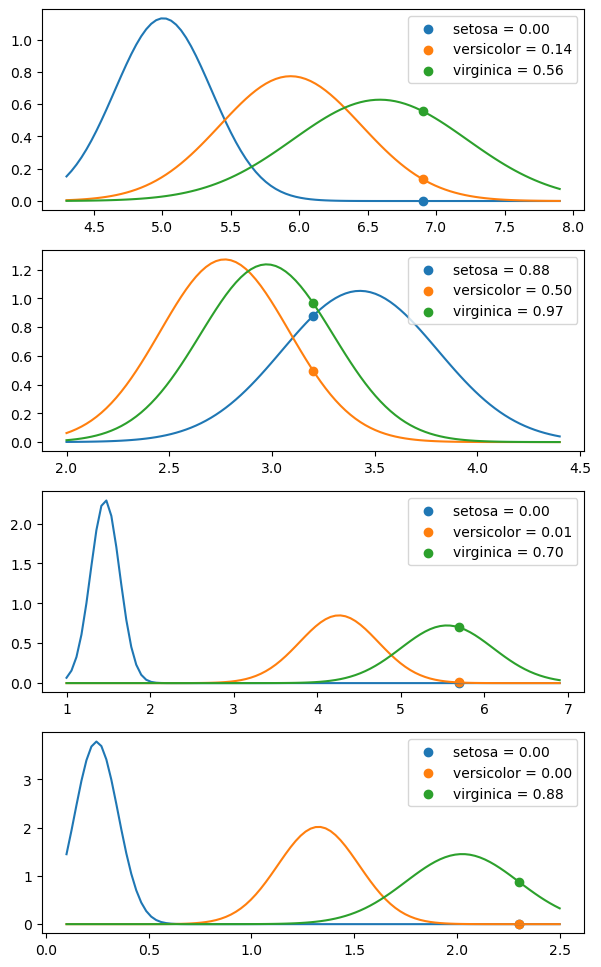

In [73]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# 확률밀도함수 := likelihood
def likelihood(x, u, s):
    p = 1 / math.sqrt( 2 * math.pi * math.pow( s, 2 )) * math.exp( - math.pow( x - u, 2) / ( 2 * math.pow( s, 2) ) ) 
    return p

# 데이터 불러오기
iris = load_iris()
iris_X, iris_y = iris.data, iris.target # type: ignore
feature_names = iris.feature_names # type: ignore
species = iris.target_names # type: ignore

# save as DataFrame
df = pd.DataFrame()
for idx, feature in enumerate(feature_names):
    df[feature] = iris_X[:,idx]
df['target'] = iris_y

prior_prob = [1/3, 1/3, 1/3]

# set test data
test_idx = 120
test_data = df.iloc[test_idx,:]
# test_posterior_prob = [1.0 for _ in range(len(species))]
test_posterior_prob = prior_prob
# 1.0: float

# matplot
fig, axes = plt.subplots(len(feature_names), 1, figsize=(7,12))
for idx_feature, ax in enumerate(axes.flat):
    x_lin = np.linspace(df.iloc[:,idx_feature].min(), df.iloc[:,idx_feature].max(), 100)

    for idx_class, name_class in enumerate(species):
        x = df[df.iloc[:,-1]==idx_class].iloc[:,idx_feature]
        x_mean, x_std = x.mean(), x.std()

        ax.plot(x_lin, [likelihood(x, x_mean, x_std) for x in x_lin]) # type: ignore

        test_x = test_data.iloc[idx_feature]
        test_y = likelihood(test_x, x_mean, x_std)

        ax.scatter(test_x, test_y, label=f'{name_class} = {test_y:.2f}') # type: ignore
        ax.legend() # type: ignore

        test_posterior_prob[idx_class] *= test_y

print(f'Class of Test data : {species[np.argmax(test_posterior_prob)]}')